<a href="https://colab.research.google.com/github/numerikid/Buku-Text-Mining/blob/main/Preprocessing_data_teks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
!pip install Sastrawi
import nltk
nltk.download()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.0 MB/s 
NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Bi

       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Unzipping grammars/book_grammars.zip.
       | Downloading 


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
teksInput = "Rina, Ilham, dan Ahmad merupakan mahasiswa prodi Sistem Informasi Universitas Tadika Mesra. Tahun ini, mereka memasuki semester lima (5) dan mendapatkan mata kuliah Pembelajaran Mesin, Multimedia, & Metode Penelitian. Menurut Rina, Pembelajaran Mesin adalah mata kuliah yang paling menyenangkan."
lower_case = teksInput.lower()
print(lower_case)

rina, ilham, dan ahmad merupakan mahasiswa prodi sistem informasi universitas tadika mesra. tahun ini, mereka memasuki semester lima (5) dan mendapatkan mata kuliah pembelajaran mesin, multimedia, & metode penelitian. menurut rina, pembelajaran mesin adalah mata kuliah yang paling menyenangkan.


In [ ]:
import re
import string
result = re.sub(r"\d+", "", lower_case)
result = result.translate(str.maketrans("","",string.punctuation))
result = re.sub('\s+',' ', result)
# results = result.strip()

print(result)

rina ilham dan ahmad merupakan mahasiswa prodi sistem informasi universitas tadika mesra tahun ini mereka memasuki semester lima dan mendapatkan mata kuliah pembelajaran mesin multimedia metode penelitian menurut rina pembelajaran mesin adalah mata kuliah yang paling menyenangkan


In [ ]:
from nltk.tokenize import word_tokenize 
tokens = nltk.tokenize.word_tokenize(result)
print(tokens)

['rina', 'ilham', 'dan', 'ahmad', 'merupakan', 'mahasiswa', 'prodi', 'sistem', 'informasi', 'universitas', 'tadika', 'mesra', 'tahun', 'ini', 'mereka', 'memasuki', 'semester', 'lima', 'dan', 'mendapatkan', 'mata', 'kuliah', 'pembelajaran', 'mesin', 'multimedia', 'metode', 'penelitian', 'menurut', 'rina', 'pembelajaran', 'mesin', 'adalah', 'mata', 'kuliah', 'yang', 'paling', 'menyenangkan']


In [ ]:
len(tokens)

37

In [ ]:
from nltk.tokenize import word_tokenize
freq_tokens = nltk.FreqDist(tokens)
print(freq_tokens.most_common())

[('rina', 2), ('dan', 2), ('mata', 2), ('kuliah', 2), ('pembelajaran', 2), ('mesin', 2), ('ilham', 1), ('ahmad', 1), ('merupakan', 1), ('mahasiswa', 1), ('prodi', 1), ('sistem', 1), ('informasi', 1), ('universitas', 1), ('tadika', 1), ('mesra', 1), ('tahun', 1), ('ini', 1), ('mereka', 1), ('memasuki', 1), ('semester', 1), ('lima', 1), ('mendapatkan', 1), ('multimedia', 1), ('metode', 1), ('penelitian', 1), ('menurut', 1), ('adalah', 1), ('yang', 1), ('paling', 1), ('menyenangkan', 1)]


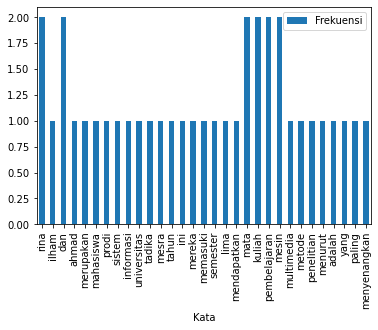

In [ ]:
import pandas as pd

data_freq_tokens = pd.DataFrame.from_dict(freq_tokens, orient='index')
data_freq_tokens.columns = ['Frekuensi']
data_freq_tokens.index.name = 'Kata'

data_freq_tokens.plot(kind='bar')

In [ ]:
from nltk.corpus import stopwords

# tokenize text
freq_tokens

# get Indonesian stopword 
list_stopwords = set(stopwords.words('indonesian'))
#remove stopword pada list token
tokens_without_stopword = []
for word in freq_tokens:
   if word not in list_stopwords:
     tokens_without_stopword.append(word)

print(tokens_without_stopword)

['rina', 'mata', 'kuliah', 'pembelajaran', 'mesin', 'ilham', 'ahmad', 'mahasiswa', 'prodi', 'sistem', 'informasi', 'universitas', 'tadika', 'mesra', 'memasuki', 'semester', 'multimedia', 'metode', 'penelitian', 'menyenangkan']


In [ ]:
len(tokens_without_stopword)

20

In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# token without stopword
list_tokens = tokens_without_stopword

# stem
output   = [(token + " : " + stemmer.stem(token)) for token in list_tokens]

output

['rina : rina',
 'mata : mata',
 'kuliah : kuliah',
 'pembelajaran : ajar',
 'mesin : mesin',
 'ilham : ilham',
 'ahmad : ahmad',
 'mahasiswa : mahasiswa',
 'prodi : prodi',
 'sistem : sistem',
 'informasi : informasi',
 'universitas : universitas',
 'tadika : tadika',
 'mesra : mesra',
 'memasuki : pasuk',
 'semester : semester',
 'multimedia : multimedia',
 'metode : metode',
 'penelitian : teliti',
 'menyenangkan : senang']